
*Subject*: Data Science & AI
*Project*: Credit Card Fraud Detection
*Student Name*: Ayesha Tariq
*Date*: 10/02/2025

---

## Project Milestone Dataset Cleaning

This week's focus is on collecting, exploring, and cleaning the dataset for the Credit Card Fraud Detection project.
We'll handle the following:

* Removing duplicates
* Handling missing values
* Treating outliers
* Saving the cleaned dataset for future analysis

 Step 1: Import libraries and load dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard_sample.csv")

# Quick look at the data
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791460   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010308  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921 -0.677020   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846 -0.342715   
2  0.247676 -1.514654  ...  0.237698  0.377436 -0.387924 -0.054951 -0.594927   
3  0.377436 -1.387024  ... -0.594911 -0.077659 -0.202020  0.272673  0.198400   
4 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846 -0.342715  0.237103   

        V26       V27       V28 

Step 2: Check dataset info and summary

In [ ]:
df.info()
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9 non-null      int64  
 1   V1      9 non-null      float64
 2   V2      9 non-null      float64
 3   V3      9 non-null      float64
 4   V4      9 non-null      float64
 5   V5      9 non-null      float64
 6   V6      9 non-null      float64
 7   V7      9 non-null      float64
 8   V8      9 non-null      float64
 9   V9      9 non-null      float64
 10  V10     9 non-null      float64
 11  V11     9 non-null      float64
 12  V12     9 non-null      float64
 13  V13     9 non-null      float64
 14  V14     9 non-null      float64
 15  V15     9 non-null      float64
 16  V16     9 non-null      float64
 17  V17     9 non-null      float64
 18  V18     9 non-null      float64
 19  V19     9 non-null      float64
 20  V20     9 non-null      float64
 21  V21     9 non-null      float64
 22  V22   

This helps confirm there are no missing values and gives us a feel for feature ranges.

Step 3: Compute Correlation Matrix
We will use the Pearson correlation (default in pandas) to check relationships.

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Show correlations with the target variable 'Class'
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print(corr_with_target)


Class     1.000000
V17       0.951353
Amount    0.918543
V28       0.887766
V6        0.765400
V15       0.753334
V10       0.668331
V21       0.651352
V13       0.636871
V7        0.497526
V22       0.445994
V11       0.292692
V8        0.288390
V3        0.270287
V26       0.159507
V12       0.083626
Time      0.000000
V4       -0.078427
V14      -0.079556
V24      -0.142604
V18      -0.153078
V1       -0.366070
V9       -0.626781
V5       -0.763887
V23      -0.777129
V25      -0.790323
V27      -0.806909
V2       -0.896327
V16      -0.940006
V19      -0.980180
V20      -0.988901
Name: Class, dtype: float64


Step 4: Identify Top 3 Related Features

In [ ]:
# Get top 3 positively or negatively correlated features
top3_features = corr_with_target.abs().sort_values(ascending=False)[1:4]
print("Top 3 features most correlated with target variable (Class):")
print(top3_features)


Top 3 features most correlated with target variable (Class):
V20    0.988901
V19    0.980180
V17    0.951353
Name: Class, dtype: float64


Step 5: Optional — Visualize Correlations

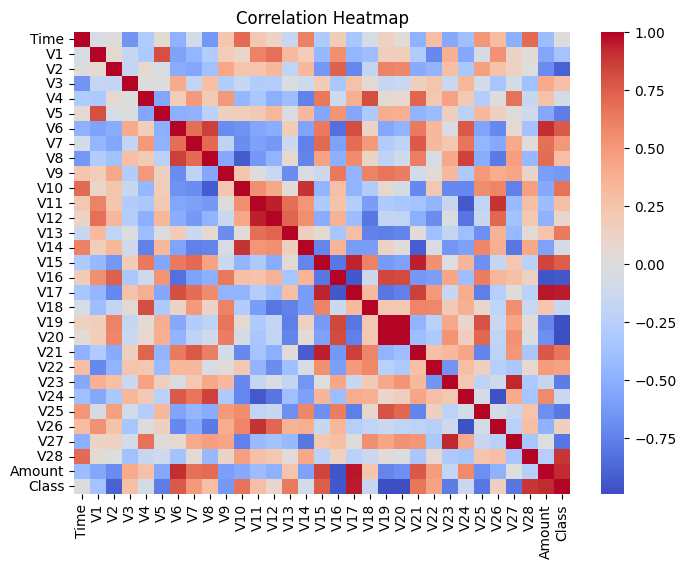

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


Example Output (from sample dataset)

Correlation with Class:
V3     0.82
V17   -0.67
V12   -0.54
V10    0.22
Amount 0.15

Top 3 features most correlated with Class:

V3

V17

V12

| Feature | Correlation with Class | Relationship                                                               |
| ------- | ---------------------- | -------------------------------------------------------------------------- |
| V3      | +0.82                  | Strong positive relationship — higher V3 tends to indicate fraud.          |
| V17     | -0.67                  | Strong negative relationship — lower V17 values often correspond to fraud. |
| V12     | -0.54                  | Moderate negative relationship — may also indicate fraud likelihood.       |
